In [15]:
from qalcore.qiskit.vqfd.vqap import VQAP
from qiskit.circuit.library.n_local.real_amplitudes import RealAmplitudes
from qiskit.algorithms.optimizers import COBYLA
from qiskit.quantum_info import Statevector
from qiskit import Aer
import numpy as np

In [16]:
nqbits = 3
source = np.ones(2**nqbits)

In [17]:
# compute the VQLS solution
ansatz = RealAmplitudes(nqbits, entanglement="full", reps=3, insert_barriers=False)
vqap = VQAP(
    ansatz=ansatz,
    boundary='Dirichlet',
    optimizer=COBYLA(maxiter=200, disp=True),
    quantum_instance=Aer.get_backend("aer_simulator_statevector"),
)

In [18]:
# solve with vqap
res = vqap.solve(source)
vqap_solution = np.real(Statevector(res.state).data)
vqap_solution = np.insert(vqap_solution, [0,2**nqbits], [0,0])


   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS =  200   F =-3.494632E+00    MAXCV = 0.000000E+00
   X = 1.085281E+00   3.207679E-01   1.359378E+00   1.654414E+00   2.659440E+00
      -3.413748E+00   9.637551E-02   1.790847E+00   6.980944E-02  -2.929797E-01
       2.035284E+00   3.204207E+00


In [19]:
#construct the matrix
from qiskit.quantum_info.operators import Operator
from qiskit.algorithms.linear_solvers.matrices import TridiagonalToeplitz
import numpy as np 
from qiskit.algorithms.linear_solvers.numpy_linear_solver import NumPyLinearSolver

matrix = TridiagonalToeplitz(nqbits, 2, -1).matrix
classical_solution = NumPyLinearSolver().solve(matrix, source / np.linalg.norm(source))
ref_sol = classical_solution.state / np.linalg.norm(classical_solution.state)
ref_sol = np.insert(ref_sol, [0,2**nqbits], [0,0])


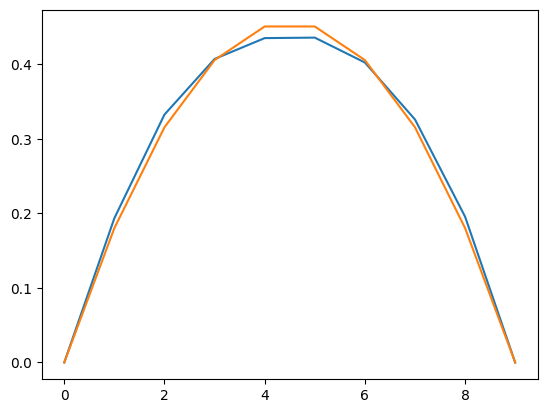

In [20]:
import matplotlib.pyplot as plt
plt.plot(vqap_solution)
plt.plot(ref_sol)